In [1]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0)
plt.rcParams['image.interpolation'] = 'nearest'

In [3]:
file = open('datasets/ImageSets/val.txt')

waldo_res = open('baseline_test_cod/waldo.txt', 'w+')
wenda_res = open('baseline_test_cod/wenda.txt', 'w+')
wizard_res = open('baseline_test_cod/wizard.txt', 'w+')

waldo_cascade = cv2.CascadeClassifier('cascade/waldo/cascade-15.xml')
wenda_cascade = cv2.CascadeClassifier('cascade/wenda/cascade.xml')
wizard_cascade = cv2.CascadeClassifier('cascade/wizard/cascade.xml')


for img_id in file.readlines():
    img_id = img_id.rstrip()
    print(img_id)
    img = imread('datasets/JPEGImages/'+ img_id + '.jpg')
    img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


    ## Waldo
    waldo_candidates, _, weights_wizard = waldo_cascade.detectMultiScale3(img_grey, 1.03, 5, outputRejectLevels=True)
    for idx, (x,y,w,h) in enumerate(waldo_candidates):
        bboxAndConf_waldo = img_id + ' ' + str(weights_wizard[idx][0]) + ' ' + str(x) + ' ' + str(y) + ' ' + str(x+w) + ' ' + str(y+h) + '\n'
        waldo_res.write(bboxAndConf_waldo)
        
    ## Wenda
    wenda_candidates, _, weights_wenda = wenda_cascade.detectMultiScale3(img_grey, 1.03, 5, outputRejectLevels=True)
    for idx, (x,y,w,h) in enumerate(wenda_candidates):
        bboxAndConf_wenda = img_id + ' ' + str(weights_wenda[idx][0]) + ' ' + str(x) + ' ' + str(y) + ' ' + str(x+w) + ' ' + str(y+h) + '\n'
        wenda_res.write(bboxAndConf_wenda)
    
    
    ## Wizard
    wizard_candidates, _, weights_wizard = wizard_cascade.detectMultiScale3(img_grey, 1.03, 5, outputRejectLevels=True)
    for idx, (x,y,w,h) in enumerate(wizard_candidates):
        bboxAndConf_wizard = img_id + ' ' + str(weights_wizard[idx][0]) + ' ' + str(x) + ' ' + str(y) + ' ' + str(x+w) + ' ' + str(y+h) + '\n'
        wizard_res.write(bboxAndConf_wizard)
        


003
018
036
043
038
056
067
074


In [5]:
file = open('datasets/ImageSets/val.txt')

# waldo_res = open('baseline_test_cod/waldo.txt', 'w+')
# wenda_res = open('baseline_test_cod/wenda.txt', 'w+')
wizard_res = open('baseline_test_cod/wizard.txt', 'w+')

# waldo_cascade = cv2.CascadeClassifier('cascade/waldo/cascade-15.xml')
# wenda_cascade = cv2.CascadeClassifier('cascade/wenda/cascade.xml')
wizard_cascade = cv2.CascadeClassifier('cascade/wizard/cascade.xml')


for img_id in file.readlines():
    img_id = img_id.rstrip()
    print(img_id)
    img = imread('datasets/JPEGImages/'+ img_id + '.jpg')
    img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


#     ## Waldo
#     waldo_candidates, _, weights_wizard = waldo_cascade.detectMultiScale3(img_grey, 1.03, 5, outputRejectLevels=True)
#     for idx, (x,y,w,h) in enumerate(waldo_candidates):
#         bboxAndConf_waldo = img_id + ' ' + str(weights_wizard[idx][0]) + ' ' + str(x) + ' ' + str(y) + ' ' + str(x+w) + ' ' + str(y+h) + '\n'
#         waldo_res.write(bboxAndConf_waldo)
        
#     ## Wenda
#     wenda_candidates, _, weights_wenda = wenda_cascade.detectMultiScale3(img_grey, 1.03, 5, outputRejectLevels=True)
#     for idx, (x,y,w,h) in enumerate(wenda_candidates):
#         bboxAndConf_wenda = img_id + ' ' + str(weights_wenda[idx][0]) + ' ' + str(x) + ' ' + str(y) + ' ' + str(x+w) + ' ' + str(y+h) + '\n'
#         wenda_res.write(bboxAndConf_wenda)
    
    
    ## Wizard
    wizard_candidates, _, weights_wizard = wizard_cascade.detectMultiScale3(img_grey, 1.03, 10, outputRejectLevels=True)
    for idx, (x,y,w,h) in enumerate(wizard_candidates):
        bboxAndConf_wizard = img_id + ' ' + str(weights_wizard[idx][0]) + ' ' + str(x) + ' ' + str(y) + ' ' + str(x+w) + ' ' + str(y+h) + '\n'
        wizard_res.write(bboxAndConf_wizard)
        

003
018
036
043
038
056
067
074


145


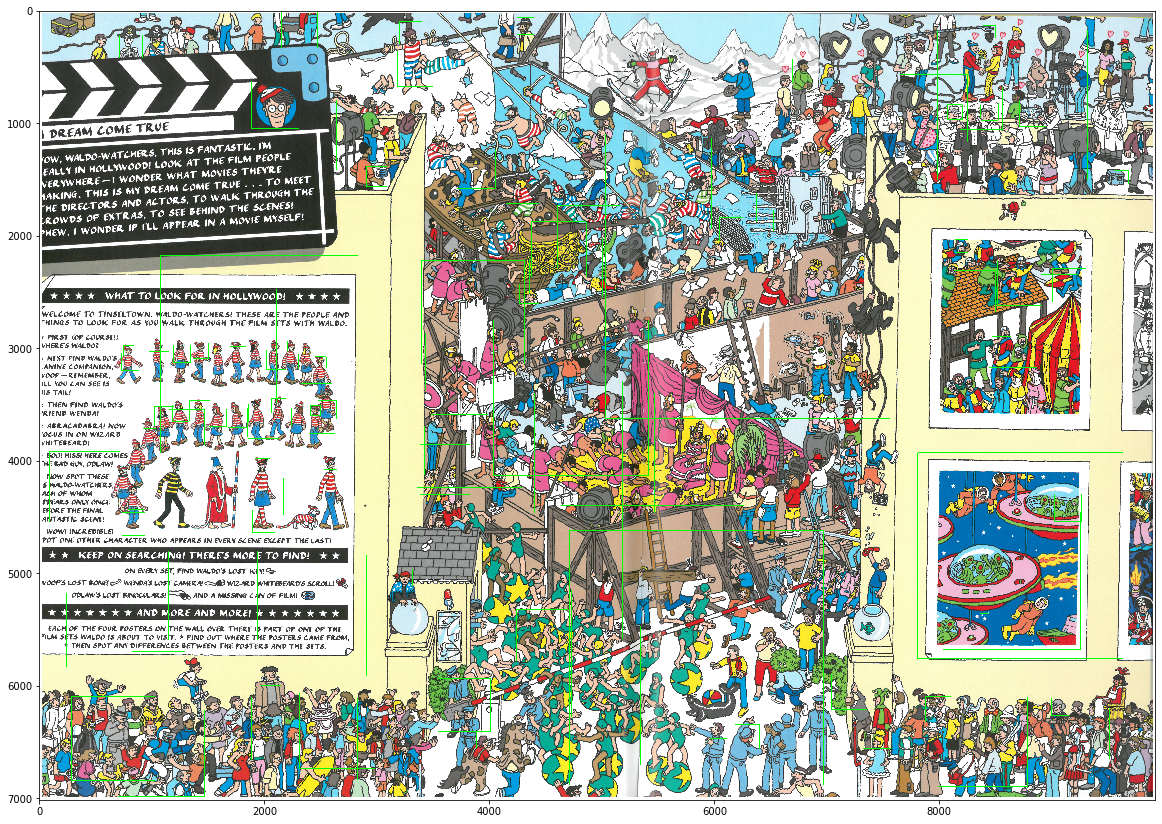

In [13]:
img_name = "018"
img = imread('datasets/JPEGImages/'+ img_name + '.jpg')
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# print(len(img_grey))
# load cascade
# waldo_cascade = cv2.CascadeClassifier('templates/waldo/classifier/cascade.xml')
waldo_cascade = cv2.CascadeClassifier('cascade/waldo/cascade.xml')


waldo_candidates, rejections, weights = waldo_cascade.detectMultiScale3(img_grey, 1.03, 7, outputRejectLevels=True)
# print(rejections)
# print(weights)
print(len(waldo_candidates))
# print(len(weights))

for idx, (x,y,w,h) in enumerate(waldo_candidates):
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(img)